# Coverage Analysis / Pre-Snap Motion Analysis

Written and Created by: Nick Furey & Richard Olekanma

---



## Overview

This report offers a novel investigation into the effects of Pre-Snap motion and the classification of predicting a successful or unsuccessful catch with those results. Pre-Snap motion has gained a lot of traction over the last decade, with many offenses implementing it to gain an advantage over defenses. The difference in player position, orientation change, direction change, and acceleration were the most relevant features in determining completion success. Moving a defender between 0.1 to 1 yard increases the catch probability up to 10% and a player's decrease in acceleration (nearing 0) boosted success ~10% as well. 
The most notable application of this report is a week to week function that an NFL team's scouting department can use to study the opposing defense and gain insight as to which coverages their opponent runs and which coverages can be attacked with higher success rates using pre-snap motions. 

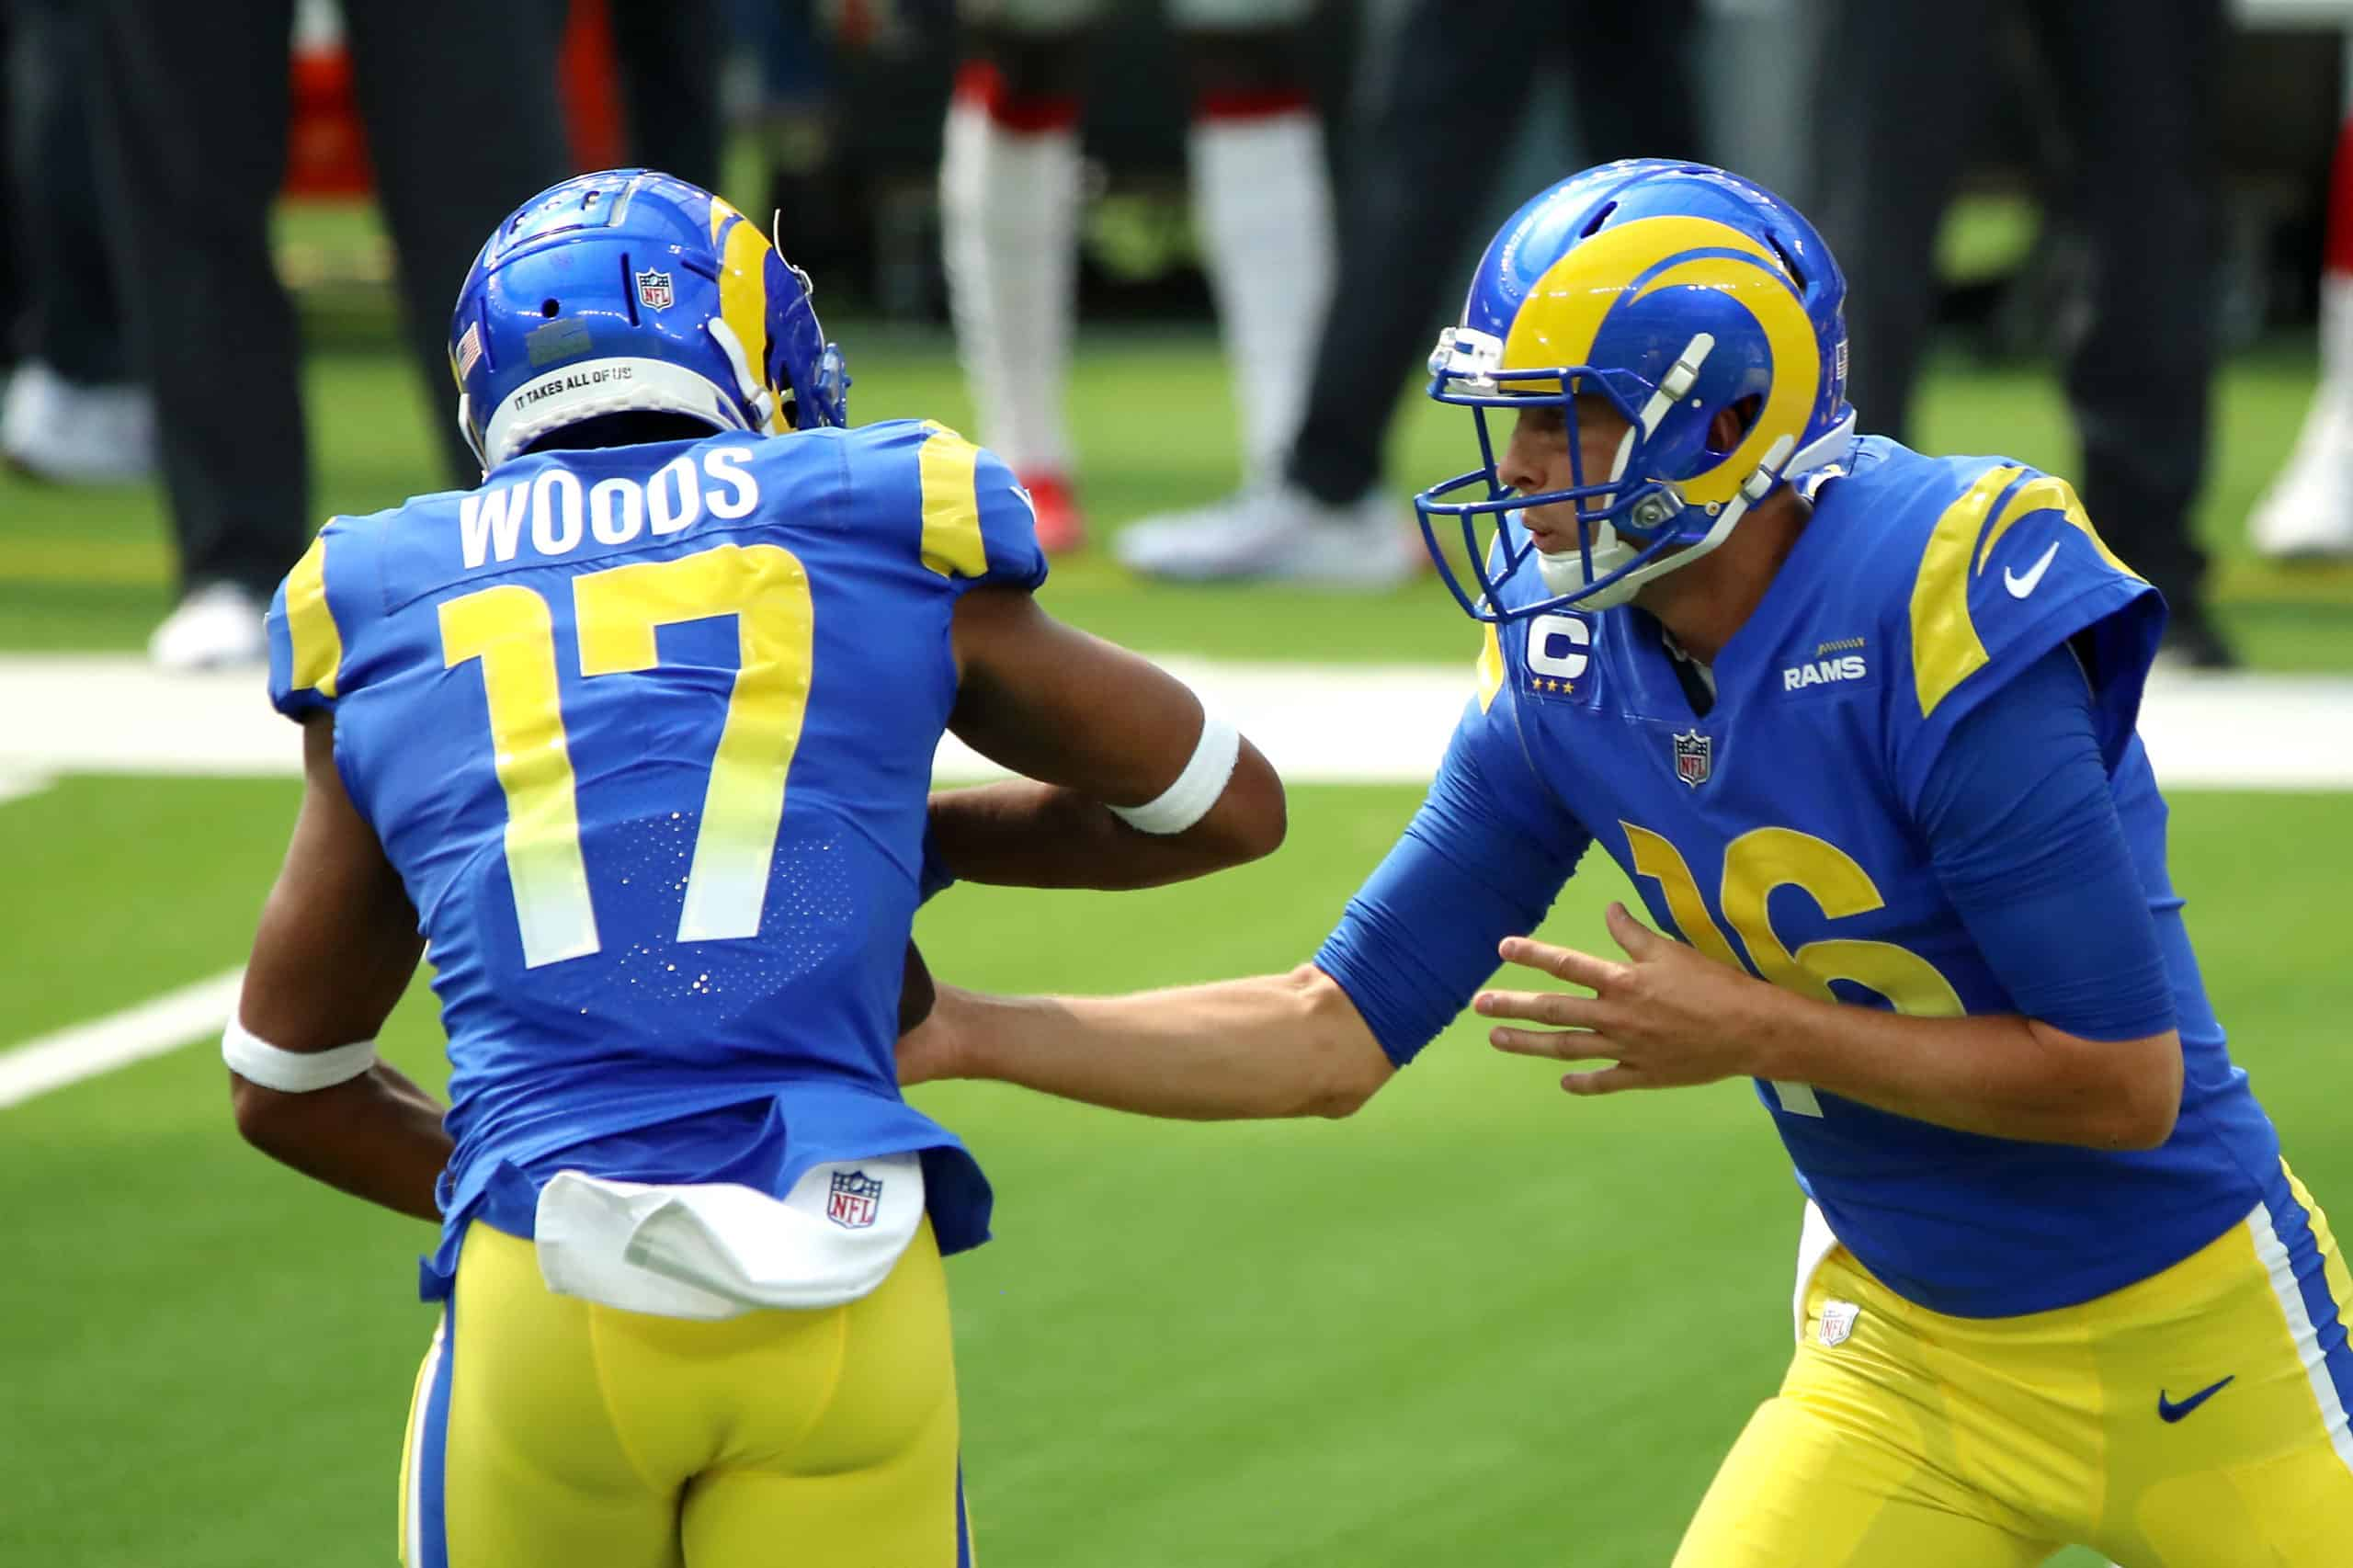

## Introduction

The first goal of this project was to identify defensive coverage type and analyze how these coverages impact the performance of the offense. The second goal was to analyze how pre-snap motion impacts the efficiency of the offense. To reach these goals, this project will be focused on first correctly identifying defensive coverage types, then using these coverages as a base to identify trends and useful information that NFL offenses would be able to use on a week to week basis. We will address how different coverages are impacted by pre-snap motion, different offensive formations, and how effective each team's coverage types are. With the knowledge this project will deliver, an NFL team will have firm analytical data to exploit the opposing defense's weaknesses and tendancies. 

## Predicting Coverages

To predict the coverage a defense was in, the individual players x and y coordinates were determined 2-4 seconds after the snap. 
- 2-4 seconds were used dependent on the total play length i.e quick passes we'd expect a defender to be in their assignement by 2 seconds post snap and for longer plays 4 seconds. 

A player's orientation to a WR and the distance from the player to the WR determined whether a player was in a man or zone assignment. From there classification into zone type was determined by depth and distance from the ball at the LOS (line of scrimmage). 
Corners in deep outside zones were put into "outside thirds", safeties deeper and in half the field into "deep halves" etc. These individual assignments were then grouped together to determine the coverage of the entire defense, i.e 3 deep thirds would mean cover 3. No deep zones and all defenders in man coverage = cover 0. 


## The Impact of Offensive Formations On Coverages

The formation an NFL offense lines up in obviously plays a large part in how the defense respounds to a play. Defensive Coverages have to adapt to the formation the offense lines up in. As can be seen below in the first graph there are large differences in the average yardage a defense allows depending on formation. Different coverage types also see different offensive formation usage rates. This can be seen below in the second graph.
<img src="https://i.postimg.cc/qMH5Rs3G/Average-yardage.png">
<img src="https://i.postimg.cc/KjSJ1bRY/counts.png">

As expected, most plays were run against a Cover 3 coverage type. Interestingly enough Singleback and I formation performed the best against this coverage type. These formations might preform better because they pose a larger threat of a running play than either Shotgun or Empty formations. The defense is more likely to be worried about defending the run in these formations and thus cannot focus all of their efforts on stopping the pass. The I formation stats might also be slightly skewed as well, as the amount of times it is run against Cover 3 is significantly less than the other formations. The fact that I formation is rarely run during pass plays likely explains why it preforms better than all of the other formations across the board. With low sample sizes such as 37 or 41, it is very possible that this formation has some extreme outliers that skew the average. Singleback also performs performs better than the traditonal passing formations such as Empty or Shotgun. What is more interesting about this information is that the sample size of Singleback is much larger than that of I formation, so it is less likely that this is due to outliers. The culprit here is probably a combination of two things. The first is that Singleback formation brings the threat of a run play which keeps the defense guessing as to how to defend the play. The second is that Singleback formation is less likely to be used in long yardage or come from behind situations where the offense is trying for longer more risky pass plays. Shotgun and Empty formations perform similarly, with Shotgun formation being the more wildly used which is to be expected. Overall this data shows some interesting trends that could be applied to gameplanning.

## Practical Knowledge to be Used 

While this exploratoy analysis is interesting, it does not provide the immediate and more applicable information an offense would need on a week to week basis. To that end a function was created that would output the same graphs as seen above for each team. An example of the output with the Atlanta Falcons as the subject can be seen below.

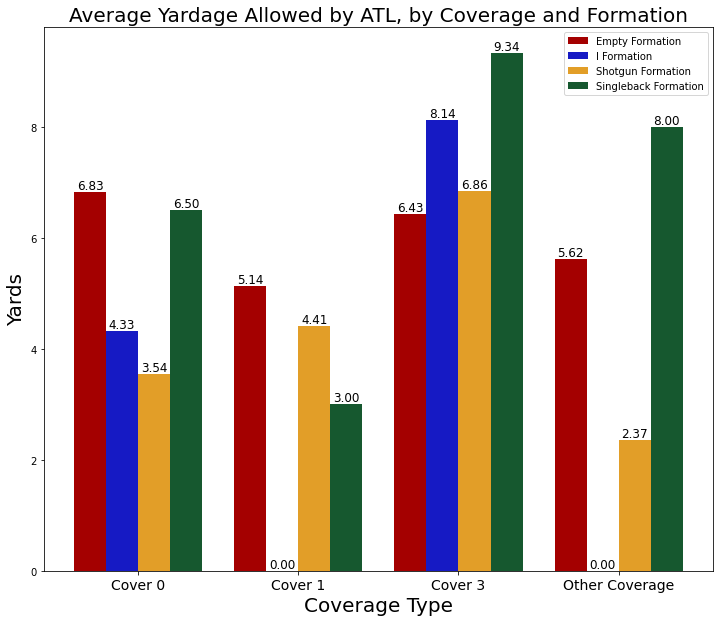
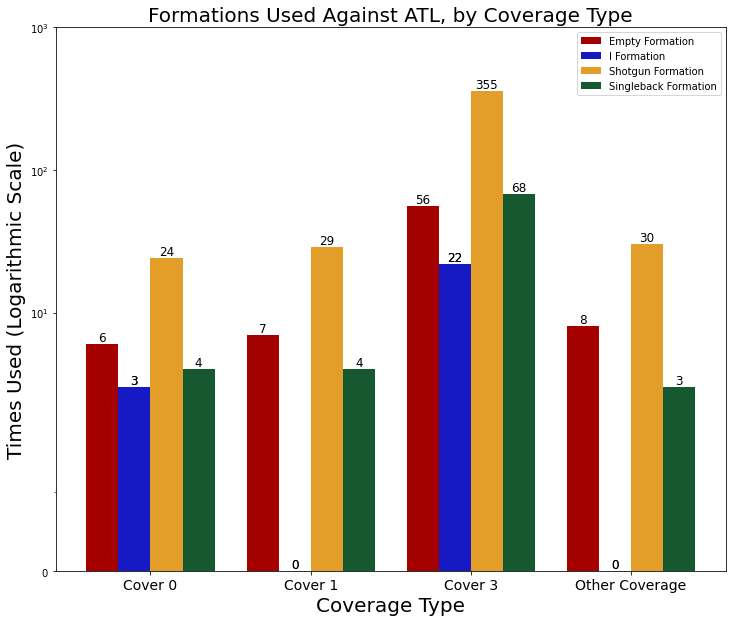

This data can be used on a week to week basis to gameplan against an opposing defense. Combined with the catch prediction function that will be introduced later in this report an NFL offense could use this data to gameplan to great effect. For example in the above graph it can be seen that while Singleback and Empty formations have similar usages rates against Cover 3 Singleback performs much better against the Falcons. NFL coaches can use this easy to digest data to gameplan ahead of an upcoming match and exploit weaknesses in a defense that might not be obvious.

## Pre-Snap Motion

Presnap Motion causes defenders to shift and account for the man in motion. Offenses can use these motions to change the strength of the formation, give an offensive player better leverage vs certain looks or use fly sweeps to get the ball to their best athletes in space.
If Defenses are attempting to disguise coverages, pre-snap motion typically reveals the coverage because defenders have to move with the offensive player in motion.

Take this example below from the Chiefs vs Ravens. The Chiefs are a notorious user of pre-snap motion, on this play, they trade the TE from the left to the right side. The Ravens defense has to adjust with the safety/nickel running along with them. That indication gives Mahomes a "tell" as to what coverage the defense is in, resulting in a completed pass. The general positives of Pre-Snap motions have been published [here](https://www.espn.com/nfl/story/_/id/28170117/pre-snap-motion-given-ravens-edge-why-more-teams-use-it) and [here](https://matchquarters.com/2020/09/24/aaron-rodgers-and-pre-snap-motion/) but there have been no studies using player tracking data to quantify the movement of defenders and whether it has an impact on the pass being completed. 

Using a function created by this team, we were able to measure precisely how much a defender moves before the snap during pre-snap motion. Along with their acceleration changes and orientation changes.

<img src="https://media.giphy.com/media/r5RJptIl4OOFOJLOYa/giphy.gif">

## Machine Learning

While understanding how much a player moves along with the coverage shell of the defense is useful, ultimately the most pertinent information is predicting the success of the upcoming passing play. Based on the coverages and player movement, successful vs unsucessful catches were modeled using [Decision Tree](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html) and [Random Forest techniques](https://builtin.com/data-science/random-forest-algorithm). 

The features created are then used to test Machine Learning Models for predicting whether or not a pass will be caught.
- The X variables will be the players movement, orientation, speed, acceleation and direction, the defensive coverage and whether or not the formation is trips. 
- The Y variable is the pass outcome of "catch"/"no catch". This is a binary variable.

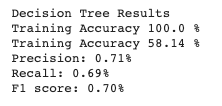

The Decision Tree Model has a training accuracy of 100%, but testing accuracy of 59%, indicating that overfitting is occuring on the training data. This means the model is too rigid in interpreting the known values and is failing with unseen data. To test this we can track the confusion matrix, precision, and recall values along with plotting the ROC curve and getting the AUC value. 

The model's ability to classify positive cases as positive (catches as catches) is 70%, recall which is the porportion of catches that are identified correctly overall is 69%. The F-1 Score which takes the harmonic mean of the two is 69%. 

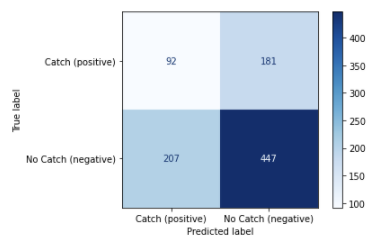

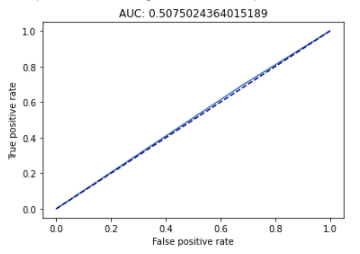

Plotting the False Positive Rate vs True Positive yields an AUC of 0.525. Suggesting the model is slightly better than a coin flip of getting the correct catch or no catch. 

The chart below indicates the most important features. Players positioning before and after the snap were significantly more relevant to the model than the positions of the players. 

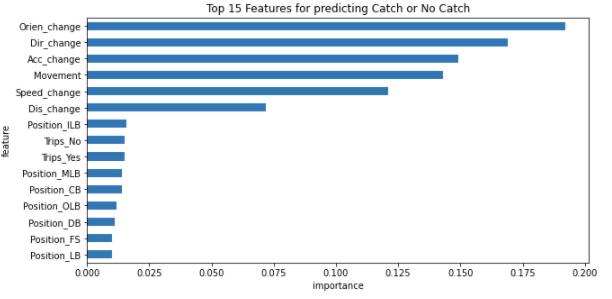

To improve the model, Random Forests were used. Random Forests are an ensemble of Decision Trees by using bagging algorithims.

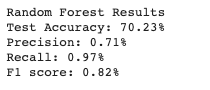

The Random Forest model increased the overall accuracy 1%, slightly increasing the precision, and increasing the recall up to 96%. This caused an overall increase in the F-1 score.

## Causal Analysis

Permutation importance uses random variable shuffling to determine significance of a variable to the model. It also displays the exact weight the variable has in the model predictions seen below.

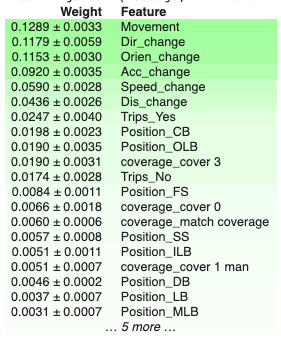

Player Movement is the most important feature, followed by Direction, Acceleration, and Orientation change. 

The Least important features are the defender positions, except for CB & OLB. These features having significance could indicate that the movement, orientation, and acceleration change of these two positions are the most important features of predicting success of catches. 

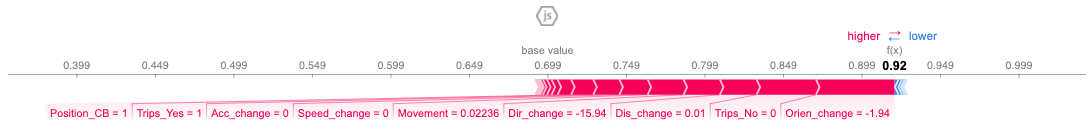

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value. 

The baseline value in this case is 0.6998, thats the average chance a pass has to be completed. 

For this instance, the model predicts a catch 0.92 (+23%) on the baseline value. Features such as Orientation change, Displacement change, Direction Change and Trips_No have boosted the value up to that 0.92 mark, as can be seen above.

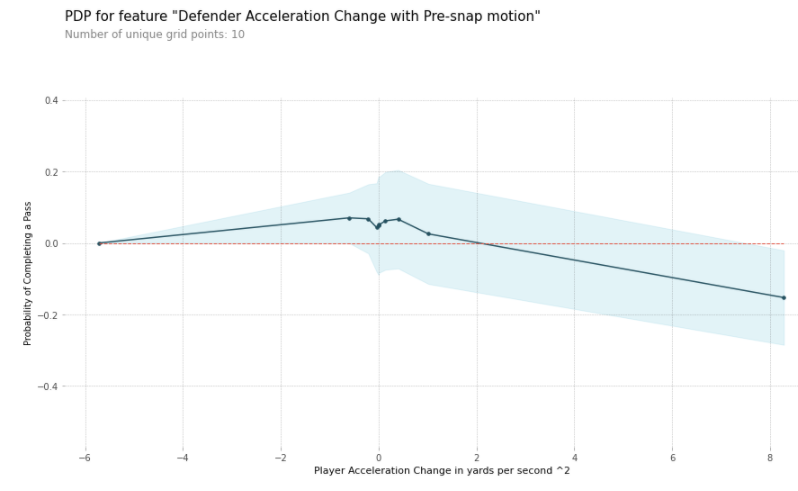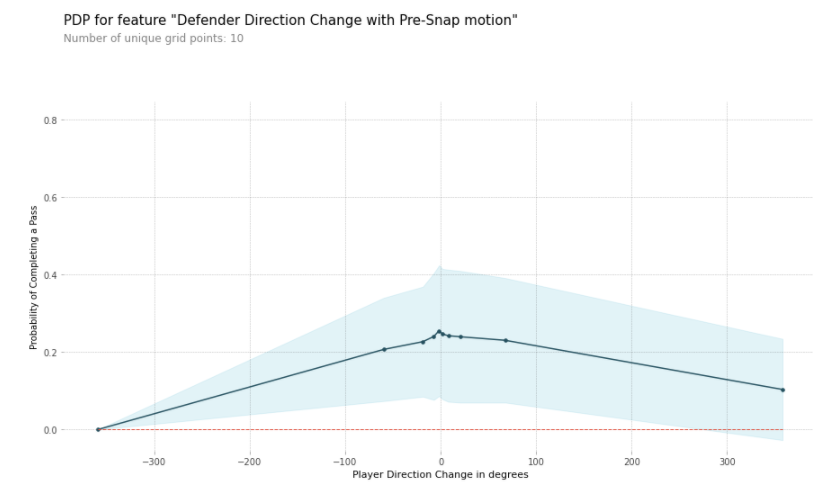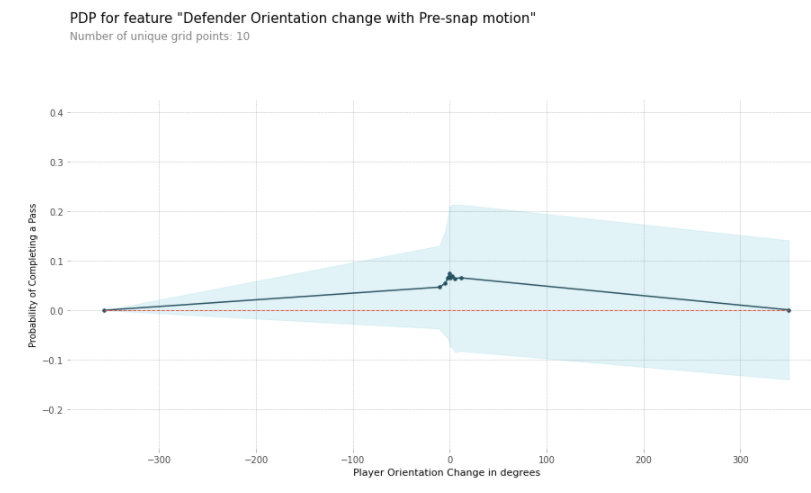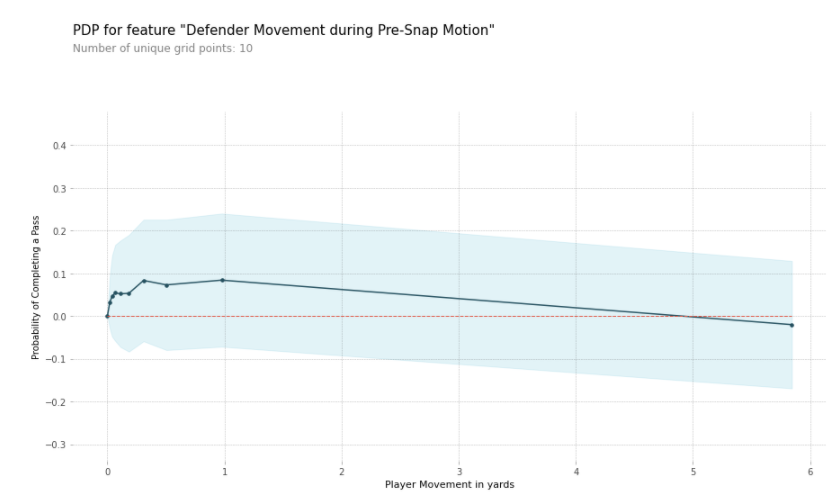

Partial Dependence Plots show exactly how much a feature affects the target prediction by holding all other variables constant. 

Observing the "Movement" variable (which occurs from tracking a players movement during pre-snap motion) a 0.1 yard movement increases the chance of a pass being completed by ~5%, and increasing that movement up to the range from 0.2 to 1 full yard increases it to ~10%. 

After 1 yard of movement, the more a player moves the less likely the offense is to complete the pass. This occurance can be theorized with the distinction of short/jet or full field motions.

Typically defenders do not move a significant amount with short in/out motions (i.e bringing the outside #1 WR in a few feet). This short displacement reveals to the offense what coverage the defense is in and therefore increases the success of a pass being completed. While full field motions with defenders running across may muddy the waters and decrease the success chance.

The probability of completing a pass for Direction and Orientation are both maximized when the Defenders orientation/direction does not change from the Pre-Snap motion. 

Examining acceleration change, the completed pass probability increases as the acceleration change nears 0 (defender is slowing down), then decreases continously if the defender is accelerating. 

A diminishing return affect can be observed with Orientation Change, Direction, and Acceleration change. The probability of completeting a pass increases up until a certain point then decreases once that threshold is exceeded. 

## Practical Uses

On a week to week basis teams can use these results as scouting tools. The function below takes in the opposing Defense and whether or not the offense is planning on running a trips formation as inputs, since defenses defend them differently than 2x2 or ace. The output is a dataframe with the coverages the defense runs, the percentage each coverage is ran, and the probability of a catch/no catch using the more accurate Random Forest model.

<img src="https://i.postimg.cc/fLF151k4/download.png">

In this simulation based on 2018 data, the Baltimore Ravens Bears ran Cover 3 59% of the time vs trips looks, followed by match coverages such as Cover 4/6/9 at 16% and Cover 0 Blitzes 12.8%. Cover 2 man and Cover 0 produced the highest catch probabilities with presnap motion with 88% and 81% respectively. While Match coverages and Cover 1 are the higest chances of non-completed passes. Pre-snap motion vs Match coverages appear to the be riskiest with a nearly 50/50 chance of completion. 

This result can be ingested by the teams scouting department on a week to week basis, allowing teams to modify the gameplan dependent on the opposition. Knowing which coverages an offense will encounter and the expected result with presnap motion is invaluable in a game of inches.

## Conclusion


The goal of this project was to examine the influences of presnap motion and coverage type on the efficiency of an offense. To that end machine learning was used to find the impact of presnap motion, and to generate the catch probability predicions. Some more traditional statistics were also used to determine how different coverages were impacted by the offensive formation. This data could be used to give a rough idea of how many yards a play might gain. When used in combination with the catch probability prediction, an NFL coach would have the foundation for new insights into attacking an opposing defense. Because this data can be easily generated for different teams quickly it can be applicable on a week to week basis. This could be a crucial early stage in the gameplanning for each week, especially since there has not been a lot of statistical research into the impacts of presnap motion on opposing defenses. This could be a great advantage to teams that implement this method of evaluation into their gameplanning. The link to code used for this report [here](https://github.com/nfurey80/NFL_Project)